<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

Every year, high schools in California allot considerable resources to improve the standardized test scores of their students [(source)](https://www.theatlantic.com/education/archive/2015/06/should-the-sat-be-part-of-school/395417/), since those scores play a significant role in college admission and curriculum development [(source)](https://global.act.org/content/global/en/products-and-services/the-act-non-us/scores/how-schools-use-the-act.html). This project analyzes participation rates and benchmark achievement averages for the SAT and ACT from schools across California to recommend whether the state should invest more funding on SAT or ACT programs.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

### Datasets Used for Analysis:
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`act_2019.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School

### Outside Research

Certain colleges and universities, including UC schools, are taking away the SAT/ACT requirements for their applications due in part to the belief that the tests unfairly discriminate against students of lower socio-economic status[(source)](https://www.insidehighered.com/admissions/article/2020/11/02/appeals-court-upholds-ruling-barring-use-sat-and-act-u-california). However, there are still various colleges in the United States that require or at least recommend inclusion of SAT or ACT scores in a student's application [(source)](https://www.insidehighered.com/admissions/article/2020/11/02/appeals-court-upholds-ruling-barring-use-sat-and-act-u-california).

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [88]:
# Code:
def get_mean(num_list):
    num = 0
    list_length = len(num_list)
    for i in num_list:
        num += i
    return num / list_length

get_mean([2, 10, 12])

8.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [89]:
# Code:
def get_std(num_list):
    n = len(num_list)
    num = 0
    mean = get_mean(num_list)
    for i in num_list:
        num += ((i - mean) ** 2)
    divided_num = num / n
    return divided_num ** 0.5

get_std([2, 10, 12])

4.320493798938574

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [90]:
# Code:
def percent_to_float(string):
    no_percent = string.strip('%')
    return float(no_percent) / 100
percent_to_float('30.5%')

0.305

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [91]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

### California SAT Data Import and Cleaninig

In [92]:
# Reading in California SAT dataset:
ca_sat = pd.read_csv('../data/sat_2019_ca.csv')
ca_sat.head(3)

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN


In [93]:
# The benchmark columns are classified as objects even though they should be floats. 
# There are also some columns that won't be used in this analysis, so those should be removed.
ca_sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    2579 non-null   float64
 1   CCode                  2579 non-null   float64
 2   CDCode                 2579 non-null   float64
 3   SCode                  2579 non-null   float64
 4   RType                  2579 non-null   object 
 5   SName                  1982 non-null   object 
 6   DName                  2521 non-null   object 
 7   CName                  2579 non-null   object 
 8   Enroll12               2579 non-null   float64
 9   NumTSTTakr12           2579 non-null   float64
 10  NumERWBenchmark12      2304 non-null   object 
 11  PctERWBenchmark12      2304 non-null   object 
 12  NumMathBenchmark12     2304 non-null   object 
 13  PctMathBenchmark12     2304 non-null   object 
 14  Enroll11               2579 non-null   float64
 15  NumT

In [94]:
# Eliminating all rows that are district or county level, so that average per-school numbers aren't improperly skewed. 
ca_sat = ca_sat[ca_sat['RType'] == 'S']

In [95]:
# Dropping columns CDS, CCode, CDCode, Year, RType, 
# and Unnamed: 25 since their values aren't useful for the analysis of schools
ca_sat.drop(columns=['CDS', 'CCode', 'CDCode', 'Unnamed: 25', 'Year', 'RType'], axis=1, inplace=True)

In [97]:
# Empty values take up ~11-13% of the benchmark columns. Rows with N/A values will be deleted
# to improve the accuracy of findings.
ca_sat.isnull().mean() * 100

SCode                     0.000000
SName                     0.000000
DName                     0.000000
CName                     0.000000
Enroll12                  0.000000
NumTSTTakr12              0.000000
NumERWBenchmark12        11.913175
PctERWBenchmark12        11.913175
NumMathBenchmark12       11.913175
PctMathBenchmark12       11.913175
Enroll11                  0.000000
NumTSTTakr11              0.000000
NumERWBenchmark11        13.377082
PctERWBenchmark11        13.377082
NumMathBenchmark11       13.377082
PctMathBenchmark11       13.377082
TotNumBothBenchmark12    11.913175
PctBothBenchmark12       11.913175
TotNumBothBenchmark11    13.377082
PctBothBenchmark11       13.377082
dtype: float64

In [98]:
# Noted large amount of '*' values.
ca_sat['NumERWBenchmark12'].value_counts()

*      484
23      18
41      15
17      15
10      15
      ... 
256      1
279      1
265      1
241      1
213      1
Name: NumERWBenchmark12, Length: 284, dtype: int64

In [99]:
# N/A values in the benchmark columns indicate that test turnout was 0 and that '*' values 
# in the benchmark columns indicate a test turnout above 0, but at or under 14 (to preserve anonymity of students)

print(ca_sat[ca_sat['NumERWBenchmark12'] == '*']['NumTSTTakr12'].max())
print(ca_sat[ca_sat['NumMathBenchmark12'] == '*']['NumTSTTakr12'].max())
print(ca_sat[ca_sat['PctERWBenchmark12'] == '*']['NumTSTTakr12'].max())
print(ca_sat[ca_sat['PctMathBenchmark12'] == '*']['NumTSTTakr12'].max())
print(ca_sat[ca_sat['PctMathBenchmark11'] == '*']['NumTSTTakr11'].max())

print(ca_sat[ca_sat['NumERWBenchmark12'].isnull()]['NumTSTTakr12'].max())
print(ca_sat[ca_sat['NumMathBenchmark12'].isnull()]['NumTSTTakr12'].max())
print(ca_sat[ca_sat['PctERWBenchmark12'].isnull()]['NumTSTTakr12'].max())
print(ca_sat[ca_sat['PctMathBenchmark12'].isnull()]['NumTSTTakr12'].max())
print(ca_sat[ca_sat['PctMathBenchmark11'].isnull()]['NumTSTTakr11'].max())

14.0
14.0
14.0
14.0
14.0
0.0
0.0
0.0
0.0
0.0


In [100]:
# Function to convert all * values to N/A
def no_asterisks(n):
    if n == '*':
        return np.nan
    else:
        return float(n)

In [101]:
# Converting all * values in the benchmark columns into N/A values
ca_sat['NumERWBenchmark12'] = ca_sat['NumERWBenchmark12'].map(no_asterisks)
ca_sat['PctERWBenchmark12'] = ca_sat['PctERWBenchmark12'].map(no_asterisks)
ca_sat['NumMathBenchmark12'] = ca_sat['NumMathBenchmark12'].map(no_asterisks)
ca_sat['PctMathBenchmark12'] = ca_sat['PctMathBenchmark12'].map(no_asterisks)
ca_sat['NumERWBenchmark11'] = ca_sat['NumERWBenchmark11'].map(no_asterisks)
ca_sat['PctERWBenchmark11'] = ca_sat['PctERWBenchmark11'].map(no_asterisks)
ca_sat['NumMathBenchmark11'] = ca_sat['NumMathBenchmark11'].map(no_asterisks)
ca_sat['PctMathBenchmark11'] = ca_sat['PctMathBenchmark11'].map(no_asterisks)                                    
ca_sat['TotNumBothBenchmark12'] = ca_sat['TotNumBothBenchmark12'].map(no_asterisks)
ca_sat['PctBothBenchmark12'] = ca_sat['PctBothBenchmark12'].map(no_asterisks)
ca_sat['TotNumBothBenchmark11'] = ca_sat['TotNumBothBenchmark11'].map(no_asterisks)
ca_sat['PctBothBenchmark11'] = ca_sat['PctBothBenchmark11'].map(no_asterisks)

In [102]:
# Take away all rows where the 12th grade benchmarks are N/A

ca_sat = ca_sat[ca_sat['NumERWBenchmark12'].notna()]

In [103]:
# There is SAT data for both CA senior and junior grades, but there is only ACT data for the senior grade. 
# Since the analysis is comparing ACT vs SAT data, the SAT data relating to the junior grade should be 
# removed from the dataset. 

ca_sat.drop(columns=['Enroll11', 'NumTSTTakr11', 'NumERWBenchmark11', 'NumMathBenchmark11', 'PctERWBenchmark11', 'PctMathBenchmark11', 'TotNumBothBenchmark11', 'PctBothBenchmark11'], axis=1, inplace=True)

In [105]:
# There are a total of 6 rows where the value for number of test takers in a grade is larger than the value for
# the total grade enrollment. It's illogical that a school would have more test takers than total students
# enrolled at the school, so my assumption is that certain test takers took the test at a school while 
# not having actually been enrolled at that school.

print(ca_sat[ca_sat['NumTSTTakr12'] > ca_sat['Enroll12']].shape)

(6, 12)


In [106]:
# No more missing values!
ca_sat.isnull().sum()

SCode                    0
SName                    0
DName                    0
CName                    0
Enroll12                 0
NumTSTTakr12             0
NumERWBenchmark12        0
PctERWBenchmark12        0
NumMathBenchmark12       0
PctMathBenchmark12       0
TotNumBothBenchmark12    0
PctBothBenchmark12       0
dtype: int64

In [107]:
# I have all the needed columns and they're the appropriate data types
ca_sat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1261 entries, 2 to 1980
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SCode                  1261 non-null   float64
 1   SName                  1261 non-null   object 
 2   DName                  1261 non-null   object 
 3   CName                  1261 non-null   object 
 4   Enroll12               1261 non-null   float64
 5   NumTSTTakr12           1261 non-null   float64
 6   NumERWBenchmark12      1261 non-null   float64
 7   PctERWBenchmark12      1261 non-null   float64
 8   NumMathBenchmark12     1261 non-null   float64
 9   PctMathBenchmark12     1261 non-null   float64
 10  TotNumBothBenchmark12  1261 non-null   float64
 11  PctBothBenchmark12     1261 non-null   float64
dtypes: float64(9), object(3)
memory usage: 128.1+ KB


In [108]:
# Confirm current column names
ca_sat.columns

Index(['SCode', 'SName', 'DName', 'CName', 'Enroll12', 'NumTSTTakr12',
       'NumERWBenchmark12', 'PctERWBenchmark12', 'NumMathBenchmark12',
       'PctMathBenchmark12', 'TotNumBothBenchmark12', 'PctBothBenchmark12'],
      dtype='object')

In [109]:
# Change column names
sat_columns_dict = {
    'SCode': 'school_code',
    'SName': 'sat_school',
    'DName': 'sat_district',
    'CName': 'sat_county',
    'Enroll12': 'sat_snrs_enrolled',
    'NumTSTTakr12': 'sat_snr_testers',
    'NumERWBenchmark12': 'sat_num_erw_bm',
    'PctERWBenchmark12': 'sat_pct_erw_bm',
    'NumMathBenchmark12': 'sat_num_math_bm',
    'PctMathBenchmark12': 'sat_pct_math_bm',
    'TotNumBothBenchmark12': 'sat_num_both_bm',
    'PctBothBenchmark12' : 'sat_pct_both_bm',
}

ca_sat.rename(columns=sat_columns_dict, inplace=True)

In [110]:
# Confirm column names are changed (more intuitive and formatted)
ca_sat.columns

Index(['school_code', 'sat_school', 'sat_district', 'sat_county',
       'sat_snrs_enrolled', 'sat_snr_testers', 'sat_num_erw_bm',
       'sat_pct_erw_bm', 'sat_num_math_bm', 'sat_pct_math_bm',
       'sat_num_both_bm', 'sat_pct_both_bm'],
      dtype='object')

In [111]:
ca_sat.head()

,school_code,sat_school,sat_district,sat_county,sat_snrs_enrolled,sat_snr_testers,sat_num_erw_bm,sat_pct_erw_bm,sat_num_math_bm,sat_pct_math_bm,sat_num_both_bm,sat_pct_both_bm
2,1930924.0,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,31.0,30.39,14.0,13.73,14.0,13.73
3,1931476.0,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,54.0,47.79,18.0,15.93,18.0,15.93
5,6061451.0,Foshay Learning Center,Los Angeles Unified,Los Angeles,166.0,106.0,68.0,64.15,36.0,33.96,36.0,33.96
6,3034956.0,Mission Viejo High,Saddleback Valley Unified,Orange,562.0,190.0,161.0,84.74,138.0,72.63,132.0,69.47
7,3336955.0,Abraham Lincoln Continuation,Riverside Unified,Riverside,114.0,17.0,3.0,17.65,2.0,11.76,2.0,11.76


### California ACT Data Import and Cleaninig

In [112]:
# Reading in CA ACT file
ca_act = pd.read_csv('../data/act_2019_ca.csv')
ca_act.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2018-19,NaN


In [113]:
# Average score and GE21 columns should be turned from objects into floats. There are also some columns 
# that won't be used in the analysis, so those will be removed.
ca_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CDS          2309 non-null   float64
 1   CCode        2309 non-null   float64
 2   CDCode       2309 non-null   float64
 3   SCode        1787 non-null   float64
 4   RType        2309 non-null   object 
 5   SName        1729 non-null   object 
 6   DName        2251 non-null   object 
 7   CName        2309 non-null   object 
 8   Enroll12     2309 non-null   float64
 9   NumTstTakr   2309 non-null   float64
 10  AvgScrRead   1953 non-null   object 
 11  AvgScrEng    1953 non-null   object 
 12  AvgScrMath   1953 non-null   object 
 13  AvgScrSci    1953 non-null   object 
 14  NumGE21      1953 non-null   object 
 15  PctGE21      1953 non-null   object 
 16  Year         2309 non-null   object 
 17  Unnamed: 17  0 non-null      float64
dtypes: float64(7), object(11)
memory usage: 325.0+ K

In [114]:
# Finding sum of all NA values per column
ca_act.isnull().sum()

CDS               1
CCode             1
CDCode            1
SCode           523
RType             1
SName           581
DName            59
CName             1
Enroll12          1
NumTstTakr        1
AvgScrRead      357
AvgScrEng       357
AvgScrMath      357
AvgScrSci       357
NumGE21         357
PctGE21         357
Year              1
Unnamed: 17    2310
dtype: int64

In [115]:
# Eliminating all rows that are district or county level, so that average per-school numbers aren't improperly skewed. 
ca_act = ca_act[ca_act['RType'] == 'S']

In [116]:
# Dropping these columns since their values aren't useful for the analysis
ca_act.drop(columns=['CDS', 'CCode', 'CDCode', 'RType', 'Unnamed: 17', 'Year'], axis=1, inplace=True)

In [117]:
# Rows with N/A values will be removed for improved accuracy of analysis
ca_act.isnull().mean() * 100

SCode          0.000000
SName          0.000000
DName          0.000000
CName          0.000000
Enroll12       0.000000
NumTstTakr     0.000000
AvgScrRead    16.898148
AvgScrEng     16.898148
AvgScrMath    16.898148
AvgScrSci     16.898148
NumGE21       16.898148
PctGE21       16.898148
dtype: float64

In [118]:
# N/A values in the scoring columns indicate that test turnout was 0 and the '*' values 
# in the scoring columns indicate a test turnout above 0, but under 14 (preserving student anonymity). Similar pattern 
# as with the SAT benchmark columns. 

print(ca_act[ca_act['AvgScrRead'] == '*']['NumTstTakr'].max())
print(ca_act[ca_act['AvgScrEng'] == '*']['NumTstTakr'].max())
print(ca_act[ca_act['AvgScrMath'] == '*']['NumTstTakr'].max())
print(ca_act[ca_act['AvgScrSci'] == '*']['NumTstTakr'].max())
print(ca_act[ca_act['NumGE21'] == '*']['NumTstTakr'].max())
print(ca_act[ca_act['PctGE21'] == '*']['NumTstTakr'].max())

print(ca_act[ca_act['AvgScrRead'].isnull()]['NumTstTakr'].max())
print(ca_act[ca_act['AvgScrEng'].isnull()]['NumTstTakr'].max())
print(ca_act[ca_act['AvgScrMath'].isnull()]['NumTstTakr'].max())
print(ca_act[ca_act['AvgScrSci'].isnull()]['NumTstTakr'].max())
print(ca_act[ca_act['NumGE21'].isnull()]['NumTstTakr'].max())
print(ca_act[ca_act['PctGE21'].isnull()]['NumTstTakr'].max())

14.0
14.0
14.0
14.0
14.0
14.0
0.0
0.0
0.0
0.0
0.0
0.0


In [119]:
# Converting all asterisk average score values into NA 
ca_act['AvgScrRead'] = ca_act['AvgScrRead'].map(no_asterisks)
ca_act['AvgScrEng'] = ca_act['AvgScrEng'].map(no_asterisks)
ca_act['AvgScrMath'] = ca_act['AvgScrMath'].map(no_asterisks)
ca_act['AvgScrSci'] = ca_act['AvgScrSci'].map(no_asterisks)
ca_act['NumGE21'] = ca_act['NumGE21'].map(no_asterisks)
ca_act['PctGE21'] = ca_act['PctGE21'].map(no_asterisks)

In [120]:
# Take away all rows where the average scores were N/A (AvgScrRead is N/A on the same rows where other
# score columns are NA)

ca_act = ca_act[ca_act['AvgScrRead'].notna()]

In [122]:
# No more null values
ca_act.isnull().sum()

SCode         0
SName         0
DName         0
CName         0
Enroll12      0
NumTstTakr    0
AvgScrRead    0
AvgScrEng     0
AvgScrMath    0
AvgScrSci     0
NumGE21       0
PctGE21       0
dtype: int64

In [123]:
# I have all the needed columns and they're the appropriate data types
ca_act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 3 to 2306
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SCode       1016 non-null   float64
 1   SName       1016 non-null   object 
 2   DName       1016 non-null   object 
 3   CName       1016 non-null   object 
 4   Enroll12    1016 non-null   float64
 5   NumTstTakr  1016 non-null   float64
 6   AvgScrRead  1016 non-null   float64
 7   AvgScrEng   1016 non-null   float64
 8   AvgScrMath  1016 non-null   float64
 9   AvgScrSci   1016 non-null   float64
 10  NumGE21     1016 non-null   float64
 11  PctGE21     1016 non-null   float64
dtypes: float64(9), object(3)
memory usage: 103.2+ KB


In [124]:
# Change column names
act_columns_dict = {
    'SCode': 'school_code',
    'SName': 'act_school',
    'DName': 'act_district',
    'CName': 'act_county',
    'Enroll12': 'act_snrs_enrolled',
    'NumTstTakr': 'act_testers',
    'AvgScrRead': 'act_avg_read_scr',
    'AvgScrEng': 'act_avg_eng_scr',
    'AvgScrMath': 'act_avg_math_scr',
    'AvgScrSci': 'act_avg_sci_scr',
    'NumGE21': 'num_act_benchmark',
    'PctGE21': 'pct_act_benchmark',
}

ca_act.rename(columns=act_columns_dict, inplace=True)

In [126]:
# Confirm column names look good
ca_act.columns

Index(['school_code', 'act_school', 'act_district', 'act_county',
       'act_snrs_enrolled', 'act_testers', 'act_avg_read_scr',
       'act_avg_eng_scr', 'act_avg_math_scr', 'act_avg_sci_scr',
       'num_act_benchmark', 'pct_act_benchmark'],
      dtype='object')

In [127]:
ca_act.head(1)

,school_code,act_school,act_district,act_county,act_snrs_enrolled,act_testers,act_avg_read_scr,act_avg_eng_scr,act_avg_math_scr,act_avg_sci_scr,num_act_benchmark,pct_act_benchmark
3,4333795.0,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23.0,22.0,22.0,23.0,34.0,64.15


In [128]:
# Strategy for joining dfs: keep the SCode column and sort the dfs by SCode, then do an inner join. 

In [129]:
ca_sat.sort_values(['school_code'], axis=0, ascending=True, inplace=True)

In [130]:
ca_act.sort_values(['school_code'], axis=0, ascending=True, inplace=True)

In [132]:
ca_sat_act = pd.merge(ca_sat, ca_act, on='school_code', how='outer')

In [133]:
# After merging the datasets and summing null values per column, one can see there are 22 schools that took the ACT,
# but not the SAT, and 267 schools that took the SAT, but not the ACT. 
ca_sat_act.isnull().sum()

school_code            0
sat_school            22
sat_district          22
sat_county            22
sat_snrs_enrolled     22
sat_snr_testers       22
sat_num_erw_bm        22
sat_pct_erw_bm        22
sat_num_math_bm       22
sat_pct_math_bm       22
sat_num_both_bm       22
sat_pct_both_bm       22
act_school           267
act_district         267
act_county           267
act_snrs_enrolled    267
act_testers          267
act_avg_read_scr     267
act_avg_eng_scr      267
act_avg_math_scr     267
act_avg_sci_scr      267
num_act_benchmark    267
pct_act_benchmark    267
dtype: int64

In [134]:
# There are 994 schools with both SAT and ACT data, including benchmark numbers. These are the schools the analysis 
# will focus on.

ca_sat_act[ca_sat_act['act_school'].notna() & (ca_sat_act['sat_school'].notna())]

,school_code,sat_school,sat_district,sat_county,sat_snrs_enrolled,sat_snr_testers,sat_num_erw_bm,sat_pct_erw_bm,sat_num_math_bm,sat_pct_math_bm,...,act_district,act_county,act_snrs_enrolled,act_testers,act_avg_read_scr,act_avg_eng_scr,act_avg_math_scr,act_avg_sci_scr,num_act_benchmark,pct_act_benchmark
0,100065.0,Oakland Unity High,Oakland Unified,Alameda,81.0,35.0,18.0,51.43,15.0,42.86,...,Oakland Unified,Alameda,81.0,53.0,17.0,15.0,19.0,18.0,12.0,22.64
1,100081.0,William J. (Pete) Knight High,Antelope Valley Union High,Los Angeles,668.0,166.0,112.0,67.47,50.0,30.12,...,Antelope Valley Union High,Los Angeles,668.0,52.0,20.0,18.0,19.0,19.0,21.0,40.38
2,100198.0,Golden Valley High,Kern High,Kern,580.0,173.0,84.0,48.55,49.0,28.32,...,Kern High,Kern,580.0,22.0,21.0,18.0,19.0,20.0,8.0,36.36
3,100255.0,Desert Mirage High,Coachella Valley Unified,Riverside,459.0,125.0,57.0,45.60,23.0,18.40,...,Coachella Valley Unified,Riverside,459.0,97.0,17.0,16.0,17.0,17.0,12.0,12.37
4,100354.0,Hawthorne Math and Science Academy,Hawthorne,Los Angeles,112.0,64.0,55.0,85.94,42.0,65.63,...,Hawthorne,Los Angeles,112.0,112.0,20.0,20.0,21.0,19.0,49.0,43.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,6061634.0,Fremont Academy of Engineering and Design,Pomona Unified,Los Angeles,90.0,43.0,22.0,51.16,9.0,20.93,...,Pomona Unified,Los Angeles,90.0,19.0,19.0,17.0,18.0,18.0,6.0,31.58
1252,6061964.0,The O'Farrell Charter,San Diego Unified,San Diego,125.0,64.0,44.0,68.75,33.0,51.56,...,San Diego Unified,San Diego,125.0,97.0,19.0,18.0,19.0,20.0,27.0,27.84
1254,6114698.0,Cobalt Institute of Math and Science Academy,Victor Valley Union High,San Bernardino,103.0,60.0,35.0,58.33,15.0,25.00,...,Victor Valley Union High,San Bernardino,103.0,19.0,20.0,18.0,19.0,19.0,7.0,36.84
1257,6116750.0,PUC Community Charter Middle and PUC Community...,Los Angeles Unified,Los Angeles,89.0,62.0,27.0,43.55,16.0,25.81,...,Los Angeles Unified,Los Angeles,89.0,83.0,17.0,16.0,18.0,18.0,20.0,24.10


In [135]:
# Narrowing the merged dataset down to those 994 schools called out above
ca_sat_act = ca_sat_act.dropna()

In [136]:
# Confirming there are now 994 rows
ca_sat_act.count()

school_code          994
sat_school           994
sat_district         994
sat_county           994
sat_snrs_enrolled    994
sat_snr_testers      994
sat_num_erw_bm       994
sat_pct_erw_bm       994
sat_num_math_bm      994
sat_pct_math_bm      994
sat_num_both_bm      994
sat_pct_both_bm      994
act_school           994
act_district         994
act_county           994
act_snrs_enrolled    994
act_testers          994
act_avg_read_scr     994
act_avg_eng_scr      994
act_avg_math_scr     994
act_avg_sci_scr      994
num_act_benchmark    994
pct_act_benchmark    994
dtype: int64

In [137]:
# Checking to make sure all schools, districts, and counties are the same in the SAT vs ACT columns. Since the only
# differences include a few commas, I will combine these columns so that they're simply called 'school', 'district',
# and 'county'. 
ca_sat_act.loc[
    
    ca_sat_act['sat_school'] != ca_sat_act['act_school'], 
    ['sat_school', 'act_school', 'sat_district', 'act_district', 'sat_county', 'act_county']
    ]

,sat_school,act_school,sat_district,act_district,sat_county,act_county
7,"Lennox Mathematics, Science and Technology Aca...",Lennox Mathematics Science and Technology Academy,Lennox,Lennox,Los Angeles,Los Angeles
243,"Math, Science, & Technology Magnet Academy at ...",Math Science & Technology Magnet Academy at Ro...,Los Angeles Unified,Los Angeles Unified,Los Angeles,Los Angeles
297,Hilda L. Solis Learning Academy School of Tech...,Hilda L. Solis Learning Academy School of Tech...,Los Angeles Unified,Los Angeles Unified,Los Angeles,Los Angeles
304,"Science, Technology, Engineering, Arts and Mat...",Science Technology Engineering Arts and Mathem...,Los Angeles Unified,Los Angeles Unified,Los Angeles,Los Angeles
315,"Ernest S. McBride, Sr. High",Ernest S. McBride Sr. High,Long Beach Unified,Long Beach Unified,Los Angeles,Los Angeles
552,"Crenshaw Science, Technology, Engineering, Mat...",Crenshaw Science Technology Engineering Math a...,Los Angeles Unified,Los Angeles Unified,Los Angeles,Los Angeles
1026,"Asawa (Ruth) SF Sch of the Arts, A Public School",Asawa (Ruth) SF Sch of the Arts A Public School,San Francisco Unified,San Francisco Unified,San Francisco,San Francisco


In [140]:
# Districts from SAT and ACT dataframes are all equal in merged dataframe
ca_sat_act[ca_sat_act['sat_district'] != ca_sat_act['act_district']]

,school_code,sat_school,sat_district,sat_county,sat_snrs_enrolled,sat_snr_testers,sat_num_erw_bm,sat_pct_erw_bm,sat_num_math_bm,sat_pct_math_bm,...,act_district,act_county,act_snrs_enrolled,act_testers,act_avg_read_scr,act_avg_eng_scr,act_avg_math_scr,act_avg_sci_scr,num_act_benchmark,pct_act_benchmark


In [141]:
# Counties from SAT and ACT dataframes are all equal in merged dataframe
ca_sat_act[ca_sat_act['sat_county'] != ca_sat_act['act_county']]

,school_code,sat_school,sat_district,sat_county,sat_snrs_enrolled,sat_snr_testers,sat_num_erw_bm,sat_pct_erw_bm,sat_num_math_bm,sat_pct_math_bm,...,act_district,act_county,act_snrs_enrolled,act_testers,act_avg_read_scr,act_avg_eng_scr,act_avg_math_scr,act_avg_sci_scr,num_act_benchmark,pct_act_benchmark


In [142]:
# Combining ACT and SAT enrollment, school, district, and county columns into three generic school, district, 
# and county colummns
ca_sat_act.drop(columns=['act_snrs_enrolled', 'act_school', 'act_district', 'act_county', 'school_code'], axis=1, inplace=True)
ca_sat_act.rename(columns= {'sat_snrs_enrolled':'snr_enroll', 'sat_school':'school', 'sat_district':'district', 'sat_county':'county'}, inplace=True)

In [143]:
# Adding columns for SAT and ACT participation rates
ca_sat_act['sat_pct_participation'] = (ca_sat_act['sat_snr_testers'] / ca_sat_act['snr_enroll']) * 100
ca_sat_act['act_pct_participation'] = (ca_sat_act['act_testers'] / ca_sat_act['snr_enroll']) * 100

In [144]:
# Saved cleaned-up merged dataframe as a CSV file in the project's data folder
ca_sat_act.to_csv(r'../data/ca_sat_act_19.csv')

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**school**|*object*|ca_sat|CA school name| 
|**district**|*object*|ca_sat|CA district name| 
|**county**|*object*|ca_sat|CA county name| 
|**snr_enroll**|*float*|ca_sat|Senior enrollment size| 
|**sat_snr_testers**|*float*|ca_sat|Number of senior SAT testers| 
|**sat_num_erw_bm**|*float*|ca_sat|Number of seniors meeting the Evidence-Based Reading & Writing (ERW) SAT benchmark| 
|**sat_pct_erw_bm**|*float*|ca_sat|Percent of seniors meeting the Evidence-Based Reading & Writing (ERW) SAT benchmark| 
|**sat_num_math_bm**|*float*|ca_sat|Number of seniors meeting the Math SAT benchmark| 
|**sat_pct_math_bm**|*float*|ca_sat|Percent of seniors meeting the Math SAT benchmark| 
|**sat_num_both_bm**|*float*|ca_sat|Number of seniors meeting both the ERW and Math SAT benchmarks| 
|**sat_pct_both_bm**|*float*|ca_sat|Percent of seniors meeting both the ERW and Math SAT benchmarks| 
|**sat_pct_participation**|*float*|ca_act|CA SAT participation for senior grade| 
|**act_snr_testers**|*float*|ca_act|Number of senior ACT testers| 
|**act_avg_read_scr**|*float*|ca_act|Average senior ACT Reading test score| 
|**act_avg_eng_scr**|*float*|ca_act|Average senior ACT English test score| 
|**act_avg_math_scr**|*float*|ca_act|Average senior ACT Math test score| 
|**act_avg_sci_scr**|*float*|ca_act|Average senior ACT Science test score| 
|**num_act_benchmark**|*float*|ca_act|Number of senior testers whose ACT composite scores are at least 21 points| 
|**pct_act_benchmark**|*float*|ca_act|Percent of senior testers whose ACT composite scores are at least 21 points| 
|**act_pct_participation**|*float*|ca_act|CA ACT participation for senior grade| 

## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [146]:
sd = {value : get_std(ca_sat_act[value]) for value in list(ca_sat_act.columns) if ca_sat_act[value].dtypes == 'float64'}
sd

{'snr_enroll': 203.19176461493845,
 'sat_snr_testers': 106.91402487828394,
 'sat_num_erw_bm': 77.30499276009962,
 'sat_pct_erw_bm': 19.5309153944152,
 'sat_num_math_bm': 65.28933528936736,
 'sat_pct_math_bm': 23.082834286284363,
 'sat_num_both_bm': 63.179503236123274,
 'sat_pct_both_bm': 23.184722700521984,
 'act_testers': 66.8993819151169,
 'act_avg_read_scr': 3.7762034104006514,
 'act_avg_eng_scr': 4.149710135309907,
 'act_avg_math_scr': 3.4641740727047483,
 'act_avg_sci_scr': 3.2932573676356656,
 'num_act_benchmark': 50.33277438361061,
 'pct_act_benchmark': 26.236814122477185,
 'sat_pct_participation': 18.197792456015463,
 'act_pct_participation': 23.547005917939135}

### What were the average participation rates for SAT and ACT last year?

In [147]:
# Calculating average senior participation rates for the SAT and ACT rates across CA schools

avg_participation_sat = get_mean(ca_sat_act['sat_pct_participation'])
avg_participation_act = get_mean(ca_sat_act['act_pct_participation'])

# Average participation is 42.6% for SAT and 25.7% for ACT

print(avg_participation_sat)
print(avg_participation_act)

42.607926553985344
25.745284408581202


### Which counties have the bottom benchmark achievement rates for SAT vs ACT?

In [181]:
# Comparing the counties with the bottom five lowest SAT and ACT benchmark achievement rates
county_low_sat_erw = ca_sat_act.groupby(['county'])['sat_pct_erw_bm'].agg(['mean']).sort_values('mean', ascending = True).head(3)
county_low_sat_math = ca_sat_act.groupby(['county'])['sat_pct_math_bm'].agg(['mean']).sort_values('mean', ascending = True).head(3)
county_low_sat_bm = ca_sat_act.groupby(['county'])['sat_pct_both_bm'].agg(['mean']).sort_values('mean', ascending = True).head(3)
county_low_act_bm = ca_sat_act.groupby(['county'])['pct_act_benchmark'].agg(['mean']).sort_values('mean', ascending = True).head(3)

In [182]:
# Three counties with lowest ERW SAT benchmark percentages
county_low_sat_erw

,mean
county,
Colusa,52.380000
San Francisco,58.251333
Kings,58.834000


In [183]:
# Three counties with lowest Math SAT benchmark percentages
# Notable: the lowest math benchmark percentage (14.3%) is substantially lower than the lowest ERW benchmark listed above (52.4%)
county_low_sat_math

,mean
county,
Colusa,14.290000
Merced,30.586667
Lake,31.110000


In [184]:
# Three counties with lowest overall SAT benchmark percentages
county_low_sat_bm

,mean
county,
Colusa,14.290000
Merced,27.999167
Kings,29.228000


In [187]:
# Three counties with lowest overall ACT benchmark percentages
# Notable: Colusa, Merced, and Kings are listed in the bottom three spots for low benchmark achievement.
county_low_act_bm

,mean
county,
Colusa,31.250
Merced,31.355
Kings,33.216


In [192]:
# When summary statistics of Colusa, Merced, and Kings are compared with the summary statistics of the whole dataset, one can see that score numbers and
# benchmark percentages are lower for the subset across the board. 
ca_sat_act[(ca_sat_act['county'] == 'Colusa') | (ca_sat_act['county'] =='Merced') | (ca_sat_act['county'] == 'Kings')].describe()

,snr_enroll,sat_snr_testers,sat_num_erw_bm,sat_pct_erw_bm,sat_num_math_bm,sat_pct_math_bm,sat_num_both_bm,sat_pct_both_bm,act_testers,act_avg_read_scr,act_avg_eng_scr,act_avg_math_scr,act_avg_sci_scr,num_act_benchmark,pct_act_benchmark,sat_pct_participation,act_pct_participation
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,282.833333,84.500000,51.888889,59.385000,27.166667,30.112778,24.777778,27.578889,48.666667,19.500000,18.111111,18.444444,19.055556,13.611111,31.866111,30.647042,20.622095
std,127.185483,39.521029,27.152920,9.775894,15.893950,9.191954,14.318049,8.639124,28.367338,1.581139,1.906302,1.381484,1.211330,7.904867,12.762900,9.554574,16.550597
min,95.000000,18.000000,9.000000,33.330000,3.000000,14.290000,3.000000,12.700000,16.000000,16.000000,14.000000,15.000000,16.000000,4.000000,3.570000,12.857143,5.373134
25%,157.250000,52.500000,27.500000,55.400000,14.500000,24.390000,14.500000,18.845000,26.500000,18.250000,17.000000,17.250000,19.000000,8.250000,23.155000,23.962938,11.751259
50%,302.000000,86.500000,54.500000,61.810000,30.500000,34.380000,27.500000,31.255000,42.500000,20.000000,18.500000,19.000000,19.000000,10.500000,32.550000,29.432106,16.208549
75%,399.250000,116.750000,70.750000,65.582500,35.500000,37.377500,33.250000,32.955000,67.000000,20.750000,19.750000,19.000000,20.000000,17.000000,42.260000,35.706054,22.751479
max,474.000000,145.000000,91.000000,71.740000,52.000000,42.730000,45.000000,39.090000,112.000000,22.000000,21.000000,20.000000,21.000000,31.000000,52.940000,49.101796,75.167785


In [193]:
ca_sat_act.describe()

,snr_enroll,sat_snr_testers,sat_num_erw_bm,sat_pct_erw_bm,sat_num_math_bm,sat_pct_math_bm,sat_num_both_bm,sat_pct_both_bm,act_testers,act_avg_read_scr,act_avg_eng_scr,act_avg_math_scr,act_avg_sci_scr,num_act_benchmark,pct_act_benchmark,sat_pct_participation,act_pct_participation
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,378.568410,154.190141,108.097586,69.362264,77.104628,47.948008,73.085513,45.418581,79.804829,21.970825,21.127767,21.358149,21.275654,44.431590,51.965211,42.607927,25.745284
std,203.294051,106.967845,77.343908,19.540747,65.322202,23.094454,63.211308,23.196394,66.933059,3.778104,4.151799,3.465918,3.294915,50.358112,26.250022,18.206953,23.558859
min,34.000000,15.000000,4.000000,10.640000,0.000000,0.000000,0.000000,0.000000,15.000000,13.000000,11.000000,15.000000,14.000000,0.000000,0.000000,12.297735,2.203857
25%,193.250000,76.000000,47.000000,54.905000,28.000000,29.745000,26.000000,26.737500,33.250000,19.000000,18.000000,19.000000,19.000000,13.000000,29.350000,30.445906,11.609739
50%,386.000000,132.000000,91.000000,72.110000,58.000000,46.905000,55.000000,43.805000,59.000000,22.000000,21.000000,21.000000,21.000000,25.000000,53.680000,38.048937,19.092155
75%,526.000000,199.000000,151.000000,86.132500,110.000000,66.670000,104.000000,63.730000,105.750000,25.000000,24.000000,24.000000,24.000000,55.000000,75.000000,48.825975,29.809935
max,1135.000000,932.000000,475.000000,100.000000,390.000000,98.980000,385.000000,98.750000,512.000000,32.000000,32.000000,32.000000,31.000000,392.000000,100.000000,102.222222,232.307692


### How do the summary statistics for the number of ACT testers vs SAT testers compare?

In [170]:
# Summary stats for ACT Testers across CA schools
ca_sat_act['act_testers'].describe()

count    994.000000
mean      79.804829
std       66.933059
min       15.000000
25%       33.250000
50%       59.000000
75%      105.750000
max      512.000000
Name: act_testers, dtype: float64

In [194]:
# Summary stats for SAT Testers across CA schools
ca_sat_act['sat_snr_testers'].describe()

count    994.000000
mean     154.190141
std      106.967845
min       15.000000
25%       76.000000
50%      132.000000
75%      199.000000
max      932.000000
Name: sat_snr_testers, dtype: float64

### How do the summary statistics for the ACT and SAT participation percentages compare?

In [173]:
# Summary stats for SAT participation percentages across CA schools
ca_sat_act['sat_pct_participation'].describe()

count    994.000000
mean      42.607927
std       18.206953
min       12.297735
25%       30.445906
50%       38.048937
75%       48.825975
max      102.222222
Name: sat_pct_participation, dtype: float64

In [196]:
# Summary stats for ACT participation percentages across CA schools
ca_sat_act['act_pct_participation'].describe()

count    994.000000
mean      25.745284
std       23.558859
min        2.203857
25%       11.609739
50%       19.092155
75%       29.809935
max      232.307692
Name: act_pct_participation, dtype: float64

### What's the mean of CA seniors who pass the SAT benchmarks for ERW, Math, and both? How about the mean of CA seniors who pass the ACT overall benchmark?

In [198]:
# Calculating mean % of CA seniors who pass the SAT benchmarks for ERW, Math, and both, as well as ACT overall benchmark

sat_mean_erw_bm = (get_mean(ca_sat_act['sat_pct_erw_bm']))
sat_mean_math_bm = (get_mean(ca_sat_act['sat_pct_math_bm']))
sat_mean_both_bm = (get_mean(ca_sat_act['sat_pct_both_bm']))
act_mean_both_bm = (get_mean(ca_sat_act['pct_act_benchmark']))
print(sat_mean_erw_bm)
print(sat_mean_math_bm)
print(sat_mean_both_bm)
print(act_mean_both_bm)

69.36226358148892
47.94800804828966
45.41858148893364
51.9652112676056


## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

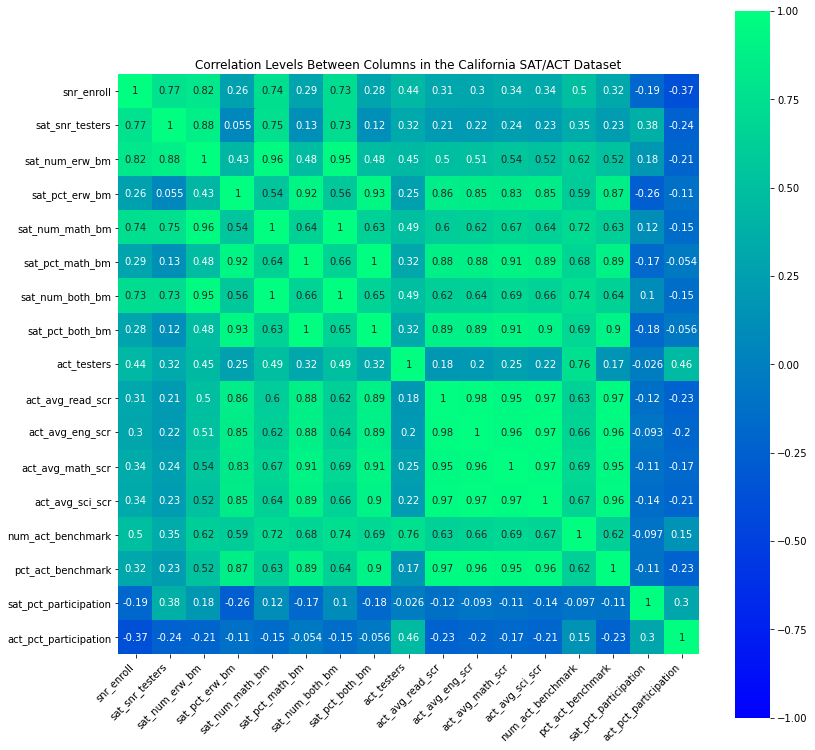

In [69]:
# Creating a heatmap to analyze correlation levels between columns
corr = ca_sat_act.corr()
plt.figure(figsize=(13, 13))
heatmap = sns.heatmap(corr,
                     vmin=-1, vmax=1, center=0, 
                     cmap='winter',
                      square=True,
                      annot=True
                     )
heatmap.set_xticklabels(
        heatmap.get_xticklabels(),
        rotation=45,
        horizontalalignment='right')
plt.title('Correlation Levels Between Columns in the California SAT/ACT Dataset');

[Source for heatmap](https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec)

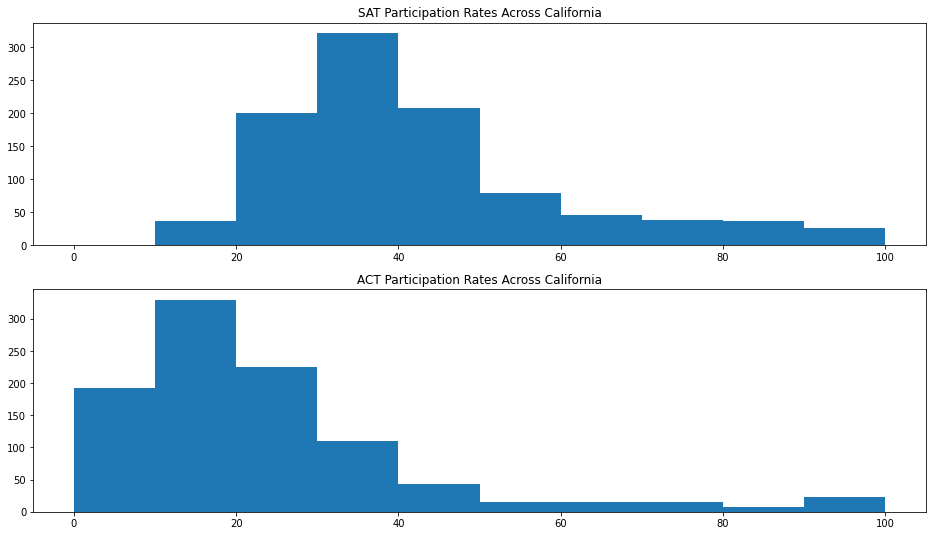

In [70]:
# Establish figure size.
plt.figure(figsize = (16,9))

# plt.subplot(211) means we have 2 rows, 1 column, and are referencing plot 1.
ax1 = plt.subplot(211)
ax1.hist(ca_sat_act['sat_pct_participation'], range=(0, 100))
ax1.set_title('SAT Participation Rates Across California')

# plt.subplot(212) means we have 2 rows, 1 column, and are referencing plot 2.
ax2 = plt.subplot(212, sharex=ax1)
ax2.hist(ca_sat_act['act_pct_participation'], range=(0, 100))
ax2.set_title('ACT Participation Rates Across California');


The frequency for ACT participation rates across CA schools skews to the left of the frequency for SAT participation rates. These histograms indicate that CA schools enroll more of their senior students in the SAT than in the ACT. 

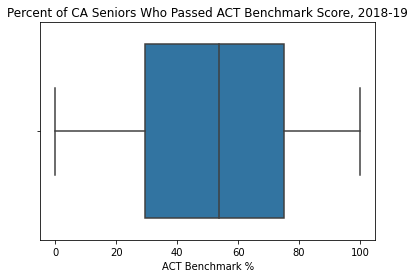

In [73]:
sns.boxplot(x=ca_sat_act['pct_act_benchmark']).set(xlabel='ACT Benchmark %')
plt.title('Percent of CA Seniors Who Passed ACT Benchmark Score, 2018-19');

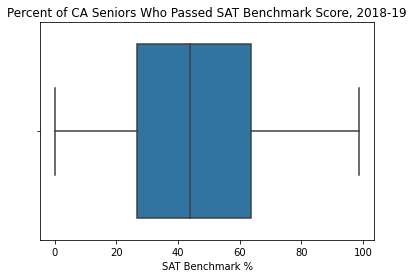

In [74]:
sns.boxplot(x=ca_sat_act['sat_pct_both_bm']).set(xlabel='SAT Benchmark %')
plt.title('Percent of CA Seniors Who Passed SAT Benchmark Score, 2018-19');

The boxplots show that the percentage of CA seniors who pass the SAT benchmark skews slightly to the left of the percentage of CA seniors who pass the ACT benchmark. The SAT median is 43.8% vs 53.7% for the ACT median, and the SAT's Q1/Q3 values are also smaller than the ACT's Q1/Q3 values (more details in describe() functions below). One may infer from this data that CA seniors would typically score slightly better on the ACT than on the SAT, which is notable since ACT has the lower participation rate of the two tests. 

s

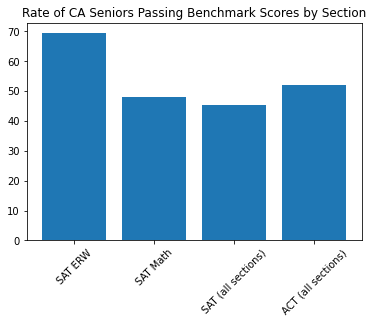

In [77]:
sat_act_bm_avgs = ['SAT ERW', 'SAT Math', 'SAT (all sections)', 'ACT (all sections)']
sat_act_means = [sat_mean_erw_bm, sat_mean_math_bm, sat_mean_both_bm, act_mean_both_bm]

plt.bar(x=sat_act_bm_avgs, height=sat_act_means)
plt.xticks(rotation=45)
plt.title('Rate of CA Seniors Passing Benchmark Scores by Section');

The 'ACT (all sections)' column is higher than the 'SAT (all sections)' column. This fact, when combined with the earlier observation that the average ACT participation rate is substantially lower than the average SAT participation rate (25.7% to 42.6%, respectively), suggests that CA schools should push for higher ACT participation rates.

Additionally, there's a significant disparity between the SAT ERW and Math columns -- 69.4% of CA seniors are passing the ERW benchmark, while only 47.9% are passing the Math benchmark. This disparity suggests that CA seniors are not as well prepared for SAT Math as they are for SAT ERW and that, in general, California should adjust their educational resources to place a higher emphasis on improved math curricula for its students. 

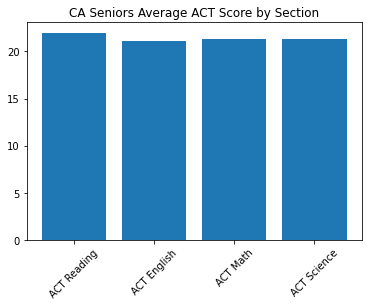

In [78]:
act_avg_scores = ['ACT Reading', 'ACT English', 'ACT Math', 'ACT Science']

plt.bar(x=act_avg_scores, height=[get_mean(ca_sat_act['act_avg_read_scr']), get_mean(ca_sat_act['act_avg_eng_scr']), get_mean(ca_sat_act['act_avg_math_scr']), get_mean(ca_sat_act['act_avg_sci_scr'])])
plt.xticks(rotation=45)
plt.title('CA Seniors Average ACT Score by Section');

The above graph shows insignificant variation between average ACT scores by section. Notably, CA seniors scored about as well in the ACT Math section as they did in other ACT sections, while the average score for Math on the SAT was
substantially lower than the SAT ERW average score. This finding suggests the ACT Math section is less difficult for CA seniors than the SAT Math section, which adds to the argument for why California should encourage increased ACT participation in its schools. 

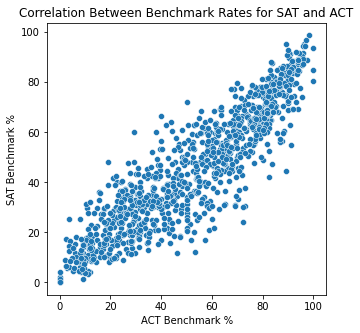

In [79]:
plt.figure(figsize=(5, 5))
sns.scatterplot(
    x='pct_act_benchmark',
    y='sat_pct_both_bm',
    data = ca_sat_act 
).set(xlabel='ACT Benchmark %', ylabel='SAT Benchmark %')
plt.title('Correlation Between Benchmark Rates for SAT and ACT');

The above scatter plot shows a strong positive correlation between the percentage of CA seniors who passed the overall benchmark score for SAT and the percentage who passed the overall benchmark score for ACT. The correlation demonstrates that if CA seniors do well in one test, they're more likely to do well in the other one too.  

## Conclusion

#### Key Takeaways:
* ACT participation is much lower than that of the SAT in CA, which shows there's ample room for growth for ACT participation numbers
* CA seniors in 2018-19 performed slightly better on the ACT than on the SAT overall in terms of the percent who reached a benchmark score. 
* Students struggled more with SAT Math than with ACT Math when compared proportionately to those tests’ other sections

#### Recommendation:
The California Department of Education should invest more of its resources on increasing ACT testing in schools across the state. This change will likely raise overall benchmark achievement rates for its seniors. 